In [1]:
cd /home/kuhlmanlab/Documents/GitHub/

/home/kuhlmanlab/Documents/GitHub


In [2]:
import luriadelbruck as ldb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
import time
%matplotlib inline

In [3]:
np.random.seed(13)

In [4]:
sampler = ldb.luriaDelbruck()
mu = 10**-8
N = int(10**10)
p=.1
k=44
m = np.arange(int(k),max(10/p,int(10*k/p)))
ldb_ms = sampler.pmf(m,mu,N)
binom_ms = spstats.binom.pmf(k,m,p)
print(np.sum(ldb_ms*binom_ms))

0.01691602398


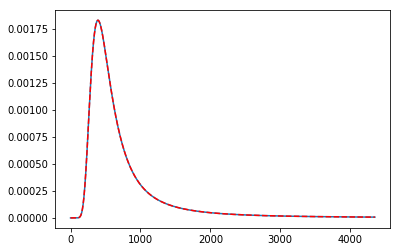

In [38]:
plt.plot(sampler.muNk_dict[100.0][44:4400])
plt.plot(ldb_ms[0:(4400-44)],'r--')

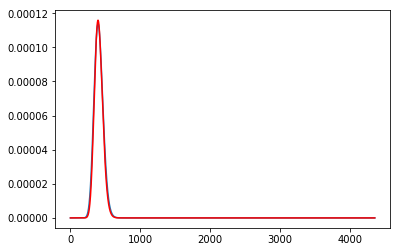

In [40]:
plt.plot(binom_ms*.0018)
plt.plot(ldb_ms*binom_ms,'r')

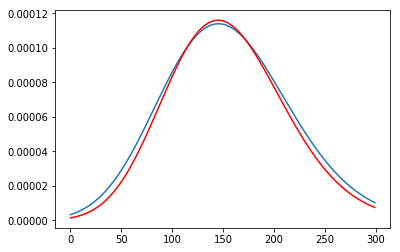

In [32]:
plt.plot(binom_ms[250:550]*.0018)
plt.plot((binom_ms*ldb_ms)[250:550],'r')

In [13]:
np.where(binom_ms==np.max(binom_ms))

(array([396]),)

In [16]:
binom_ms[396]

0.063274805725025696

In [18]:
np.where(ldb_ms==np.max(ldb_ms))

(array([392]),)

In [17]:
sampler.muNk_dict[100][436]

0.0018323473016782445

In [ ]:
def simulatedExperiment(mu, N, plating_dilution=10**6, size=20, N_init=10):
    sampler = ldb.luriaDelbruck()
    mutant_sample = sampler.rvs(mu, N, size=size)
    N_start = np.random.poisson(N_init,size=size)
    N_finish = N_start*N/N_init
    N_sample = np.random.poisson(N_finish/plating_dilution)*plating_dilution
    return mutant_sample, N_sample

def perfectExperiment(mu, N, size=20):
    sampler = ldb.luriaDelbruck()
    mutant_sample = sampler.rvs(mu, N, size=size)
    N_sample = N * np.ones(size)
    return mutant_sample, N_sample

def mutationRateEstimate(mutant_sample, N_sample):
    maximum_likelihood_estimator = ldb.SarkarMaSandri(mutant_sample, N_sample)
    return maximum_likelihood_estimator.fit(full_output=False,disp=0,skip_hessian=True).params[0]

def simulatedError(mu, N, plating_dilution, size, reps):
    results = []
    for i in range(reps):
        mutant_sample, N_sample = simulatedExperiment(mu, N, plating_dilution, size)
        results.append(mutationRateEstimate(mutant_sample, N_sample))
    return np.array(results)

def simulatedPerfectError(mu, N, size, reps):
    results = []
    for i in range(reps):
        mutant_sample, N_sample = perfectExperiment(mu, N, size)
        results.append(mutationRateEstimate(mutant_sample, N_sample))
    return np.array(results)

In [ ]:
start=time.time()
mu_true = 10**-8
N_true = 10**8
plating_dilution = 10**6
experiment_size= 40
repetitions = 10
results = simulatedError(mu_true, N_true, plating_dilution, experiment_size, repetitions)
perfect_results = simulatedPerfectError(mu_true, N_true, experiment_size, repetitions)
end=time.time()
print(end-start)

In [ ]:
print(results)
print('The true mutation rate is', mu_true)
print('The mean estimated mutation rate is',np.mean(results))
print('The standard deviation of the estimated mutation rate is',np.std(results))
print('The lowest estimate of the mutation rate is',np.min(results))
print('The highest estimate of the mutation rate is',np.max(results))

In [ ]:
print(perfect_results)
print('The true mutation rate is', mu_true)
print('The mean estimated mutation rate is',np.mean(perfect_results))
print('The standard deviation of the estimated mutation rate is',np.std(perfect_results))
print('The lowest estimate of the mutation rate is',np.min(perfect_results))
print('The highest estimate of the mutation rate is',np.max(perfect_results))